In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import random

In [3]:
df = pd.read_csv('C:/Users/Elizabeth/Desktop/Gustavo Becerra/TDP/KD.csv')
df.drop('Unnamed: 0', axis= 1, inplace= True) #No needed it 
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,1


In [4]:
col_ot1 = [col for col in df.columns if col != 'classification' ] #input features
col_ot = 'pcv'
col_dep = 'classification' #for predictions

#n_pcv =(df[col_ot] >= 45.0).all()
if (df[col_ot]<= 45.0).all() == True:
   col_dep == 0
else:
   col_dep == 1
#col_ot = n_pcv

df[col_dep].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [5]:
encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

df['classification'] = encoder.fit_transform(df['classification'])

In [6]:
x = df[col_ot]
y = df[col_dep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [7]:
acd = tree.DecisionTreeClassifier()

model = acd.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = acd.predict(x_test.values.reshape(-1,1))
acd_acc = accuracy_score(y_test, y_pred)

print (f"Accuracy_score is:" , acd_acc)

Accuracy_score is: 0.88


In [8]:
arr_pcv =[]
for i in range(100):
    arr_pcv.append(random.uniform(0.1,100.0))
    #print(arr_pcv)
print(len(y_pred), len(arr_pcv))

100 100


In [9]:
pcv_pred = pd.DataFrame({'PCV generado': arr_pcv, 'KND?': y_pred})
pcv_pred

,PCV generado,KND?
0,1.414480,0
1,3.887337,0
2,33.387095,1
3,69.807772,0
4,32.955625,0
...,...,...
95,16.684561,0
96,66.010065,0
97,27.744649,1
98,43.829971,1


[Text(0.4264705882352941, 0.9285714285714286, 'X[0] <= 28.5\ngini = 0.468\nsamples = 300\nvalue = [188, 112]\nclass = 0'),
 Text(0.17647058823529413, 0.7857142857142857, 'X[0] <= 27.5\ngini = 0.086\nsamples = 178\nvalue = [170, 8]\nclass = 0'),
 Text(0.11764705882352941, 0.6428571428571429, 'X[0] <= 25.5\ngini = 0.046\nsamples = 168\nvalue = [164, 4]\nclass = 0'),
 Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]\nclass = 0'),
 Text(0.17647058823529413, 0.5, 'X[0] <= 26.5\ngini = 0.119\nsamples = 63\nvalue = [59, 4]\nclass = 0'),
 Text(0.11764705882352941, 0.35714285714285715, 'gini = 0.126\nsamples = 59\nvalue = [55, 4]\nclass = 0'),
 Text(0.23529411764705882, 0.35714285714285715, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.23529411764705882, 0.6428571428571429, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]\nclass = 0'),
 Text(0.6764705882352942, 0.7857142857142857, 'X[0] <= 35.5\ngini = 0.252\nsamples = 122\nvalue = [18, 104]\nclass = 1'),


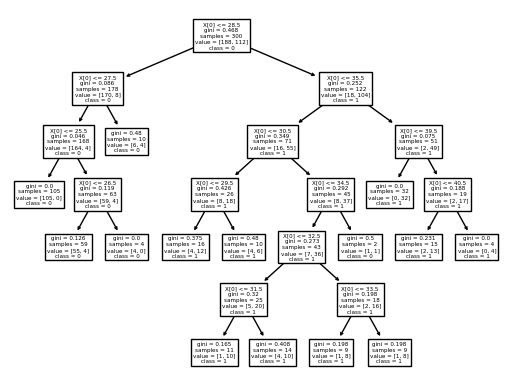

In [16]:
tree.plot_tree(acd)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[56  6]
 [ 6 32]]
